In [1]:
import pandas as pd
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
shark_df = pd.read_excel(url)

In [2]:
shark_df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,...,Blacktip reef shark,"Trinidad Guardian, 2/11/2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Lauren O'Neill,F,29,...,Bull shark,"Nine News, 12/31/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15 Jan-2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,Paradise Island Resort,Swimming,male,M,10,...,NaN,"Caribbean Loop News, 1/15;2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,...,White shark,"A. Currie, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
shark_df.isna().sum(axis=1)
#Some lines seems to contain no data, will check and delete these lines.

0        9
1       11
2        8
3        9
4        8
        ..
6960    22
6961    22
6962    22
6963    22
6964    22
Length: 6965, dtype: int64

In [3]:
shark_df.dropna(thresh=21)

#when rows with 21 NaN values are deleted, the row number drops significantly
shark_df.dropna(thresh=21).shape

(1558, 23)

In [4]:
new_df = shark_df.copy()

In [5]:
new_df = new_df.dropna(thresh=21)

In [6]:
new_df.shape

(1558, 23)

In [7]:
#Checking if there's mostly empty columns aling with columns we decided we will not need to analyse

columns = list(new_df.columns)
empty_columns = [item for item in columns if new_df[item].isna().sum() > 1500]
print(f"Columns with all mostly NaN values: {empty_columns}")

Columns with all mostly NaN values: ['Unnamed: 21', 'Unnamed: 22']


In [8]:
#deleting the mostly empty columns + Unnamed: 11 and copying a new df

new2_df = new_df.copy()
new2_df = new2_df.drop(["Name","Age","Date",
                        "Time", "Source", "pdf",
                        'href',"href formula",
                        'Unnamed: 11', 'Unnamed: 21', 'Unnamed: 22'], axis=1).reset_index()
new2_df.shape

(1558, 13)

In [9]:
#Checking for duplicated data but there is none

new2_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1553    False
1554    False
1555    False
1556    False
1557    False
Length: 1558, dtype: bool

In [10]:
#to create a unify column names, lowered the charachters and replaced " " & "." with "_"

new2_df.columns = [column.lower().replace(" ", "_").replace(".","_") for column in new2_df.columns]

In [11]:
new2_df

,index,year,type,country,state,location,activity,sex,injury,species_,case_number,case_number_1,original_order
0,134,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,"White shark, 13'",2022.09.25,2022.09.25,6802.0
1,138,2022.0,Unprovoked,AUSTRALIA,New South Wales,Avoca,Surfing,M,Puncture wounds to right hand & forearm,Bronze whaler,2022.08.31,2022.08.31,6799.0
2,143,2022.0,Unprovoked,USA,Florida,"Looe Key, Monroe County",Snorkeling,M,"Lower left leg severely bitten, necessitating ...","Bull shark, 9'",2022.08.13,2022.08.13,6794.0
3,147,2022.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Wading,M,Minor bite to left foot,Blacktip shark?,2022.07.25,2022.07.25,6790.0
4,148,2022.0,Unprovoked,USA,New York,"Kismet Beach, Long Island",Surfing,M,Four-inch cut to right foot,6' shark,2022.07.20,2022.07.20,6789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,6444,1880.0,Unprovoked,AUSTRALIA,Queensland,"Petrie Bight, Brisbane River",Swimming,M,"Feet bitten, surgically amputated FATAL",Bull shark,1880.11.25,1880.11.25,495.0
1554,6552,1868.0,Unprovoked,INDIA,Hoogly River,Ghat,Standing,M,"FATAL, upper left thigh, groin & buttocks seve...",Identified as C. gangeticus by Dr. J. Fayrer,1868.05.13,1868.05.13,387.0
1555,6880,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,Arm severed,Bull shark,ND.0064,ND.0064,61.0
1556,6881,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,Right leg lacerated & surgically amputated,Bull shark,ND.0063,ND.0063,60.0


In [12]:
new2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1558 non-null   int64  
 1   year            1558 non-null   float64
 2   type            1558 non-null   object 
 3   country         1558 non-null   object 
 4   state           1558 non-null   object 
 5   location        1558 non-null   object 
 6   activity        1558 non-null   object 
 7   sex             1558 non-null   object 
 8   injury          1558 non-null   object 
 9   species_        1558 non-null   object 
 10  case_number     1558 non-null   object 
 11  case_number_1   1558 non-null   object 
 12  original_order  1558 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 158.4+ KB


In [13]:
new2_df['year'] = new2_df['year'].astype(int)

new2_df['country'] = new2_df['country'].str.title()
new2_df.sex = new2_df.sex.replace('lli', method='ffill')
new2_df['country'] = new2_df['country'].replace('Usa', 'United States')

In [14]:
new2_df

,index,year,type,country,state,location,activity,sex,injury,species_,case_number,case_number_1,original_order
0,134,2022,Unprovoked,South Africa,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,"White shark, 13'",2022.09.25,2022.09.25,6802.0
1,138,2022,Unprovoked,Australia,New South Wales,Avoca,Surfing,M,Puncture wounds to right hand & forearm,Bronze whaler,2022.08.31,2022.08.31,6799.0
2,143,2022,Unprovoked,United States,Florida,"Looe Key, Monroe County",Snorkeling,M,"Lower left leg severely bitten, necessitating ...","Bull shark, 9'",2022.08.13,2022.08.13,6794.0
3,147,2022,Unprovoked,United States,Florida,"Daytona Beach, Volusia County",Wading,M,Minor bite to left foot,Blacktip shark?,2022.07.25,2022.07.25,6790.0
4,148,2022,Unprovoked,United States,New York,"Kismet Beach, Long Island",Surfing,M,Four-inch cut to right foot,6' shark,2022.07.20,2022.07.20,6789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,6444,1880,Unprovoked,Australia,Queensland,"Petrie Bight, Brisbane River",Swimming,M,"Feet bitten, surgically amputated FATAL",Bull shark,1880.11.25,1880.11.25,495.0
1554,6552,1868,Unprovoked,India,Hoogly River,Ghat,Standing,M,"FATAL, upper left thigh, groin & buttocks seve...",Identified as C. gangeticus by Dr. J. Fayrer,1868.05.13,1868.05.13,387.0
1555,6880,0,Unprovoked,Iraq,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,Arm severed,Bull shark,ND.0064,ND.0064,61.0
1556,6881,0,Unprovoked,Iraq,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,Right leg lacerated & surgically amputated,Bull shark,ND.0063,ND.0063,60.0


In [16]:
new2_df.tail()

,index,year,type,country,state,location,activity,sex,injury,species_,case_number,case_number_1,original_order
1553,6444,1880,Unprovoked,Australia,Queensland,"Petrie Bight, Brisbane River",Swimming,M,"Feet bitten, surgically amputated FATAL",Bull shark,1880.11.25,1880.11.25,495.0
1554,6552,1868,Unprovoked,India,Hoogly River,Ghat,Standing,M,"FATAL, upper left thigh, groin & buttocks seve...",Identified as C. gangeticus by Dr. J. Fayrer,1868.05.13,1868.05.13,387.0
1555,6880,0,Unprovoked,Iraq,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,Arm severed,Bull shark,ND.0064,ND.0064,61.0
1556,6881,0,Unprovoked,Iraq,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,Right leg lacerated & surgically amputated,Bull shark,ND.0063,ND.0063,60.0
1557,6903,0,Unprovoked,Iraq,Basrah,Shatt-el Arab River near a small boat stand,Swimming,M,"FATAL, left leg bitten with severe blood loss",Bull shark,ND.0038,ND.0038,38.0


In [17]:
new2_df["country"].unique()

array(['South Africa', 'Australia', 'United States', 'Thailand', 'Mexico',
       'New Zealand', 'New Caledonia', 'French Polynesia', 'Brazil',
       'Bahamas', 'Fiji', 'England', 'Costa Rica', 'Maldives', 'Cuba',
       'Indonesia', 'Spain', 'Egypt', 'Ecuador', 'Reunion', 'Jamaica',
       'Italy', 'Papua New Guinea', 'Russia', 'Seychelles', 'Vietnam',
       'Mozambique', 'Scotland', 'United Kingdom', 'Taiwan', 'Guam',
       'Croatia', 'Tonga', 'St. Maartin', 'Grand Cayman', 'Vanuatu',
       'Venezuela', 'Turks & Caicos', 'Okinawa', 'Marshall Islands',
       'Hong Kong', 'Japan', 'South Korea', 'Israel', 'Micronesia',
       'Columbia', 'New Britain', 'Palau', 'Solomon Islands',
       'Federated States Of Micronesia', 'Greece', 'British West Indies',
       'North Pacific Ocean', 'Bermuda', 'American Samoa',
       'Pacific Ocean', 'Senegal', 'Argentina', 'El Salvador', 'Iraq',
       'Panama', 'India'], dtype=object)

In [18]:
Geo_location = new2_df['country'].value_counts()
Geo_location_hotspot = Geo_location.idxmax()

print("The geographic location with most shark attacks:", Geo_location_hotspot)

The geographic location with most shark attacks: United States


In [19]:
grouped = new2_df.groupby('country')
grouped

In [20]:
## To get an idea of which country has highest reported shark attacks
##Can further look withing USA which is lowest reported state??? 

grouped.size()

country
American Samoa      2
Argentina           1
Australia         355
Bahamas            28
Bermuda             1
                 ... 
United Kingdom      1
United States     736
Vanuatu             2
Venezuela           2
Vietnam             3
Length: 62, dtype: int64

In [21]:
new3 = new2_df.groupby(['country', 'sex'])['state'].count()
new3




country         sex
American Samoa  M        2
Argentina       M        1
Australia       F       36
                M      319
Bahamas         F        6
                      ... 
Vanuatu         F        1
                M        1
Venezuela       M        2
Vietnam         F        2
                M        1
Name: state, Length: 81, dtype: int64

In [22]:
# Set display options to show all rows and columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# Perform groupby operation
new3 = new2_df.groupby(['country', 'sex'])['state'].count()

# Display the entire content
print(new3)

country         sex
American Samoa  M        2
Argentina       M        1
Australia       F       36
                M      319
Bahamas         F        6
                      ... 
Vanuatu         F        1
                M        1
Venezuela       M        2
Vietnam         F        2
                M        1
Name: state, Length: 81, dtype: int64


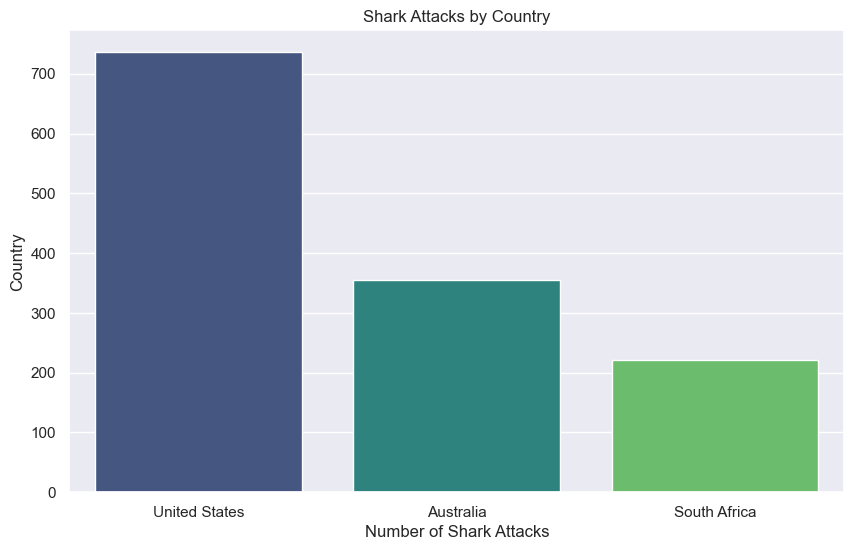

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

# now aggregating the data to count the number of attacks per country
country_attacks = new2_df['country'].value_counts().reset_index()
country_attacks.columns = ['country', 'Attacks']

# selecting countries with more than 30 attacks recorded

country_attacks = country_attacks[country_attacks['Attacks'] > 30]

# Sort the dataframe by the number of attacks in descending order
country_attacks = country_attacks.sort_values(by='Attacks', ascending=False)


# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='Attacks', data=country_attacks, palette='viridis')
plt.xlabel('Number of Shark Attacks')
plt.ylabel('Country')
plt.title('Shark Attacks by Country')
plt.show()


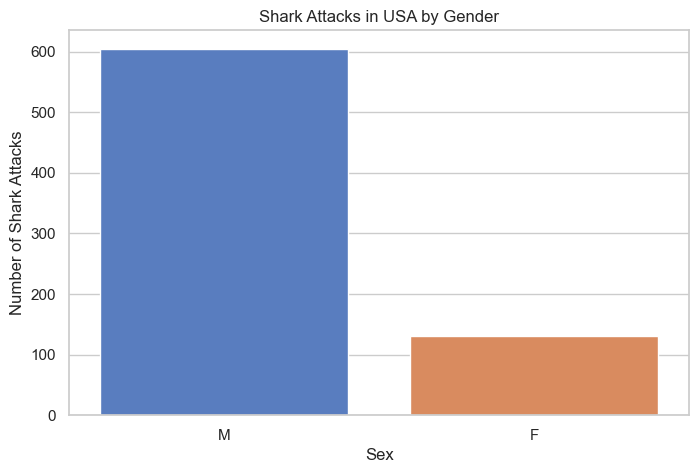

In [24]:

# next we filtered the data for the United States and then aggregated the data by gender
usa_attacks = new2_df[new2_df['country'] == 'United States']

# Drop rows with missing values in the 'sex' column
usa_attacks = usa_attacks.dropna(subset=['sex'])

usa_attacks_gender = usa_attacks['sex'].value_counts().reset_index()
usa_attacks_gender.columns = ['sex', 'Attacks']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='Attacks', data=usa_attacks_gender, palette='muted')
plt.xlabel('Sex')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks in USA by Gender')
plt.show()



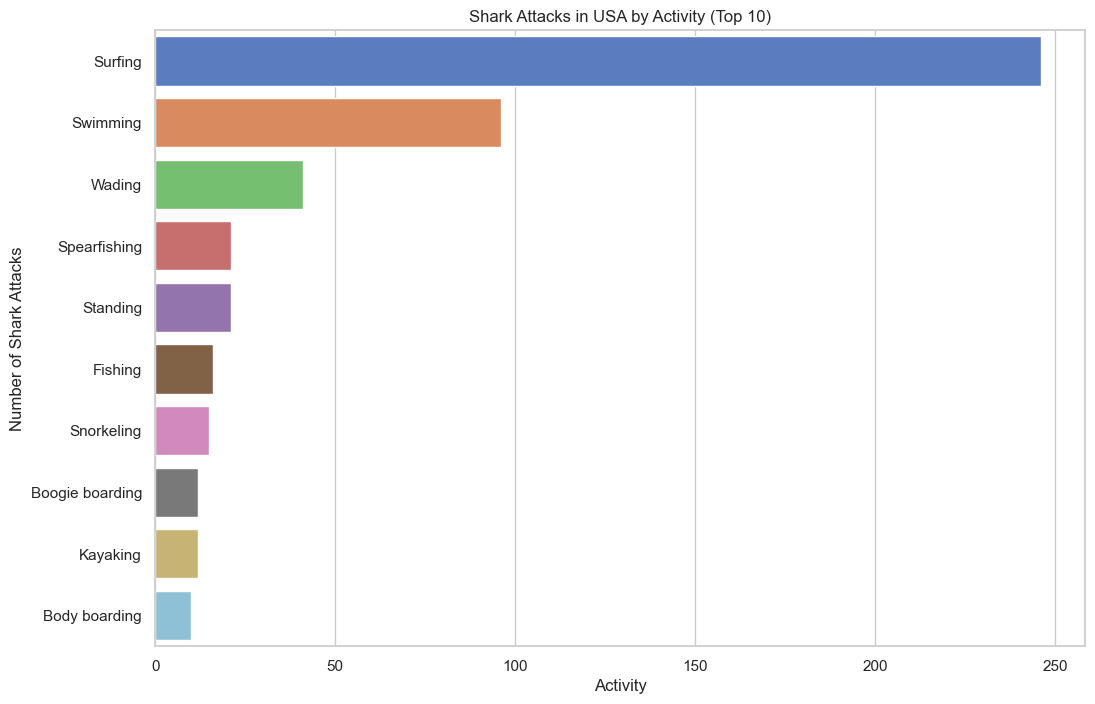

In [25]:

# filtered the data for the United States and then aggregated the data by activity
usa_attacks = new2_df[new2_df['country'] == 'United States']

# Count the number of attacks for each activity
usa_attacks_activity = usa_attacks['activity'].value_counts().reset_index()
usa_attacks_activity.columns = ['Attacks', 'activity']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='activity', y='Attacks', data=usa_attacks_activity.head(10), palette='muted')
plt.xlabel('Activity')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks in USA by Activity (Top 10)')
plt.show()

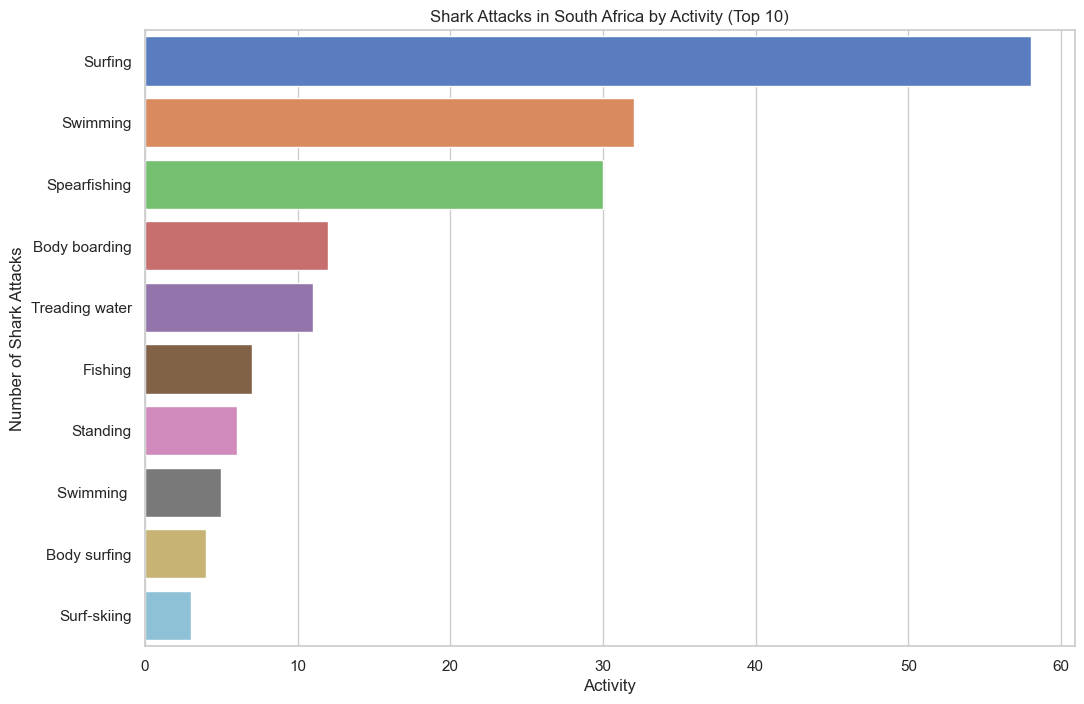

In [26]:

# filtered the data for the United States and then aggregated the data by activity
usa_attacks = new2_df[new2_df['country'] == 'South Africa']

# Count the number of attacks for each activity
usa_attacks_activity = usa_attacks['activity'].value_counts().reset_index()
usa_attacks_activity.columns = ['Attacks', 'activity']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='activity', y='Attacks', data=usa_attacks_activity.head(10), palette='muted')
plt.xlabel('Activity')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks in South Africa by Activity (Top 10)')
plt.show()

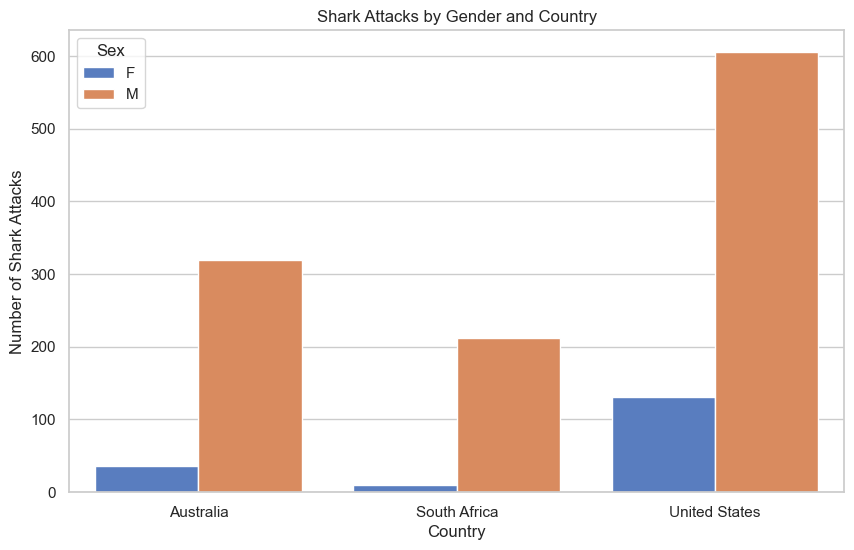

In [27]:
# Filter the data for the United States, Australia and Southe africa
usa_australia_attacks = new2_df[new2_df['country'].isin(['United States', 'Australia', 'South Africa'])]

# Drop rows with missing values in the 'sex' column
usa_australia_attacks = usa_australia_attacks.dropna(subset=['sex'])

# Aggregate the data by country and gender
usa_australia_attacks_gender = usa_australia_attacks.groupby(['country', 'sex']).size().reset_index(name='Attacks')

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the bar graph
sns.barplot(x='country', y='Attacks', hue='sex', data=usa_australia_attacks_gender, palette='muted')

plt.xlabel('Country')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks by Gender and Country')
plt.legend(title='Sex')
plt.show()


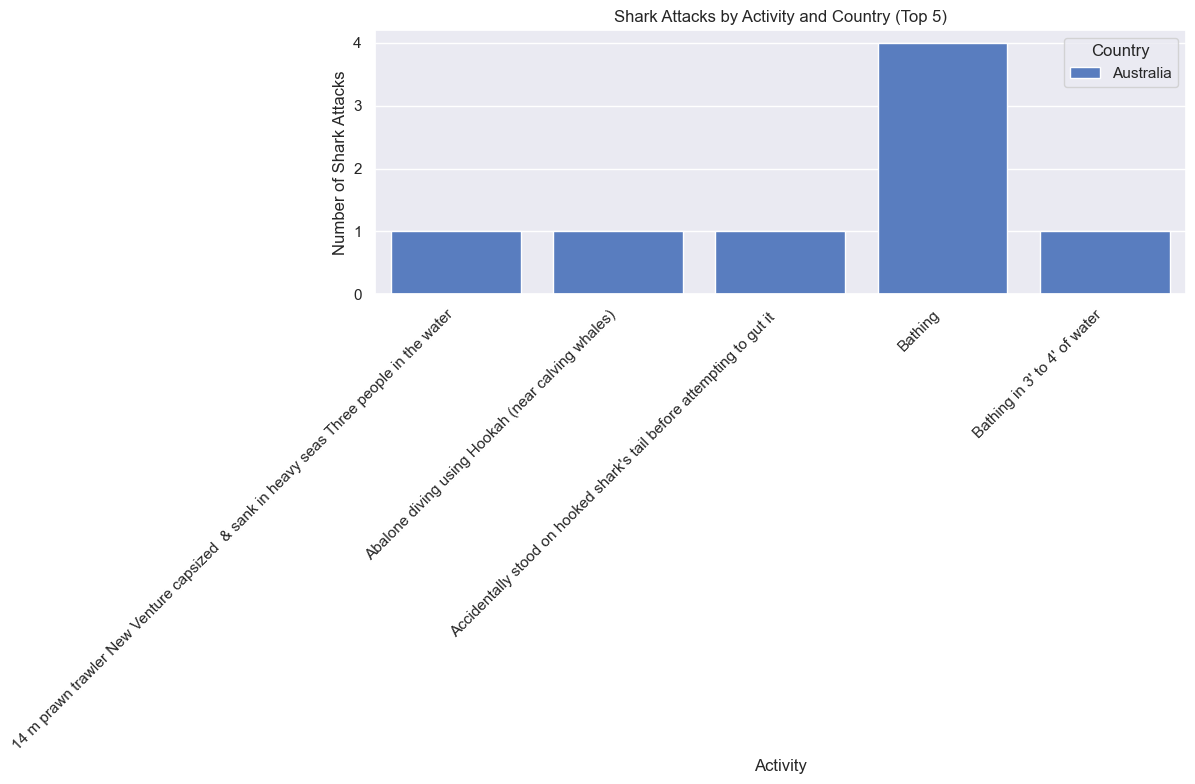

In [28]:
# Filter the data for the United States, South Africa, and Australia
countries = ['United States', 'Australia', 'South Africa']
countries_attacks = new2_df[new2_df['country'].isin(countries)]

# Count the number of attacks for each activity
countries_attacks_activity = countries_attacks.groupby(['country', 'activity']).size().reset_index(name='Attacks')

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

# Plot the bar graph
sns.barplot(x='activity', y='Attacks', hue='country', data=countries_attacks_activity.head(5), palette='muted')

plt.xlabel('Activity')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks by Activity and Country (Top 5)')
plt.legend(title='Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



##Did not generate the correct expected observation 

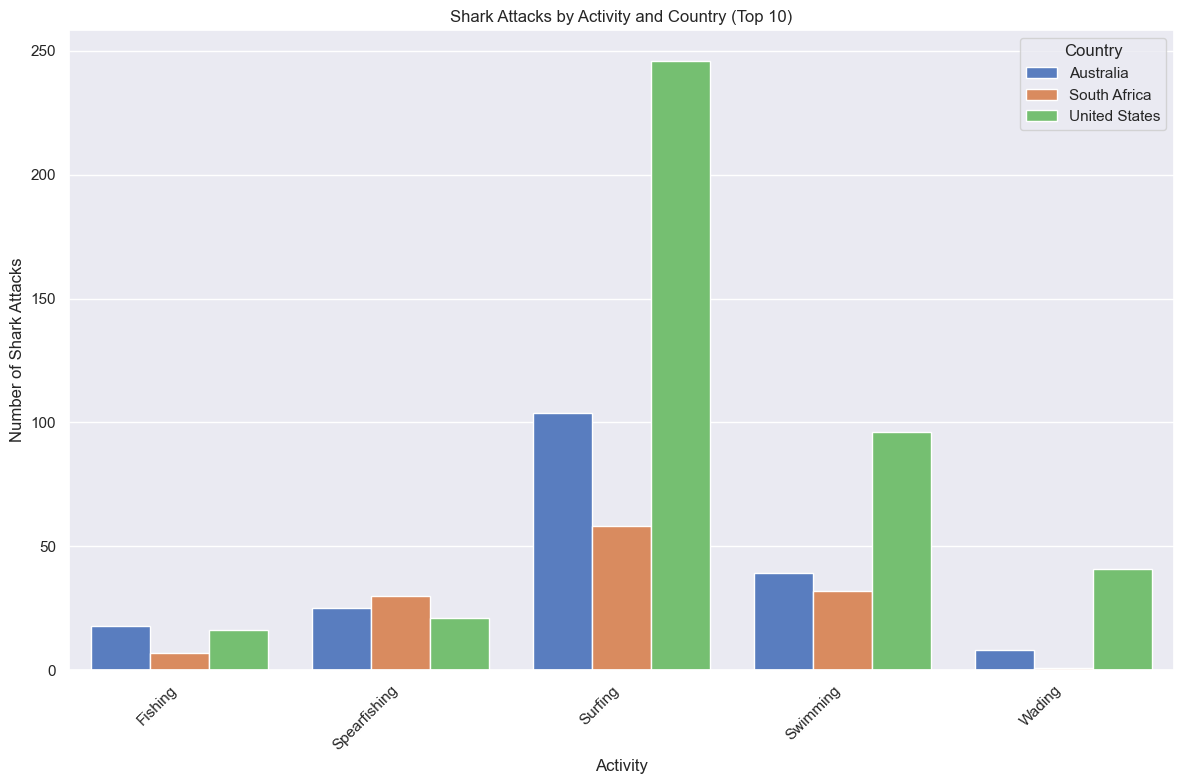

In [29]:
# Filter the data for the United States, South Africa, and Australia
countries = ['United States', 'South Africa', 'Australia']
countries_attacks = new2_df[new2_df['country'].isin(countries)]



# Count the number of attacks for each activity
countries_attacks_activity = countries_attacks.groupby(['country', 'activity']).size().reset_index(name='Attacks')

# Filter for the top 5 activities associated with increased shark attacks (first I made a variable 'top activities' to get the largest(5) values index) grouped by activity
top_activities = countries_attacks_activity.groupby('activity')['Attacks'].sum().nlargest(5).index
countries_attacks_activity = countries_attacks_activity[countries_attacks_activity['activity'].isin(top_activities)]

# for plotting the data in different styles I have used between "darkgrid" and "whitegrid" and adjust the generated graph size
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

# Plot the bar graph
sns.barplot(x='activity', y='Attacks', hue='country', data=countries_attacks_activity, palette='muted')

plt.xlabel('Activity')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks by Activity and Country (Top 10)')
plt.legend(title='Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


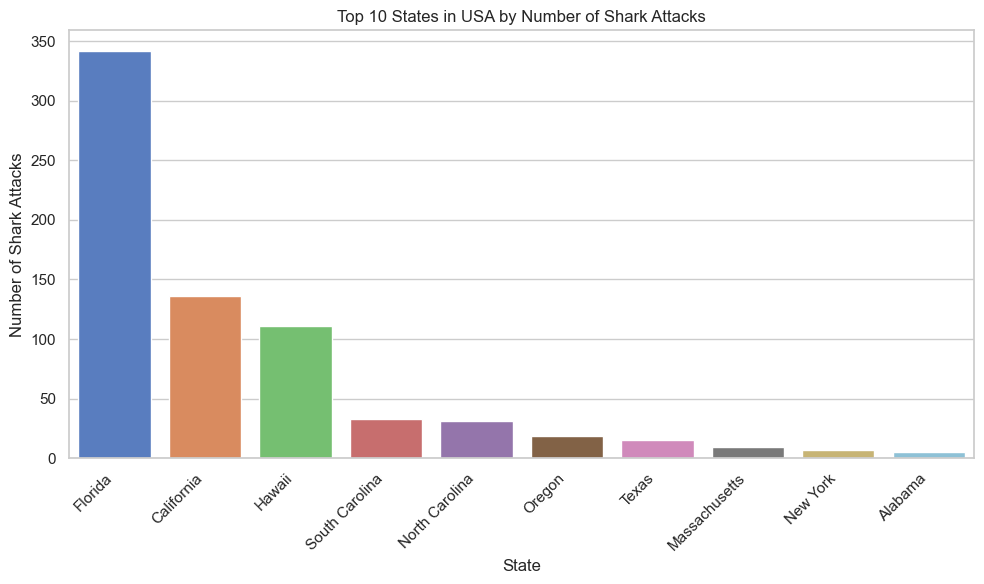

In [30]:

# Filtering the data for the United States and then aggregating the data by gender
usa_attacks = new2_df[new2_df['country'] == 'United States']

# Drop rows with missing values in the 'state' column
usa_attacks = usa_attacks.dropna(subset=['state'])

# Select only the top 15 states within the USA
usa_top_10_states = usa_attacks['state'].value_counts().head(10).reset_index()
usa_top_10_states.columns = ['state', 'Attacks']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the bar graph
sns.barplot(x='state', y='Attacks', data=usa_top_10_states, palette='muted')

plt.xlabel('State')
plt.ylabel('Number of Shark Attacks')
plt.title('Top 10 States in USA by Number of Shark Attacks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


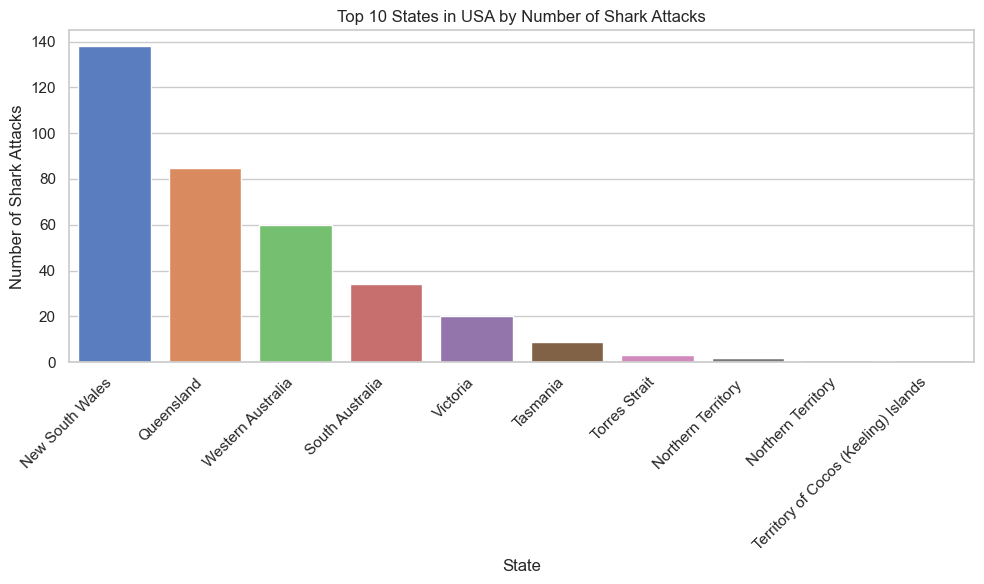

In [31]:

# Filtering the data for the United States and then aggregate the data by gender
usa_attacks = new2_df[new2_df['country'] == 'Australia']

# Drop rows with missing values in the 'state' column
usa_attacks = usa_attacks.dropna(subset=['state'])

# Select only the top 15 states within the USA
usa_top_10_states = usa_attacks['state'].value_counts().head(10).reset_index()
usa_top_10_states.columns = ['state', 'Attacks']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the bar graph
sns.barplot(x='state', y='Attacks', data=usa_top_10_states, palette='muted')

plt.xlabel('State')
plt.ylabel('Number of Shark Attacks')
plt.title('Top 10 States in USA by Number of Shark Attacks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


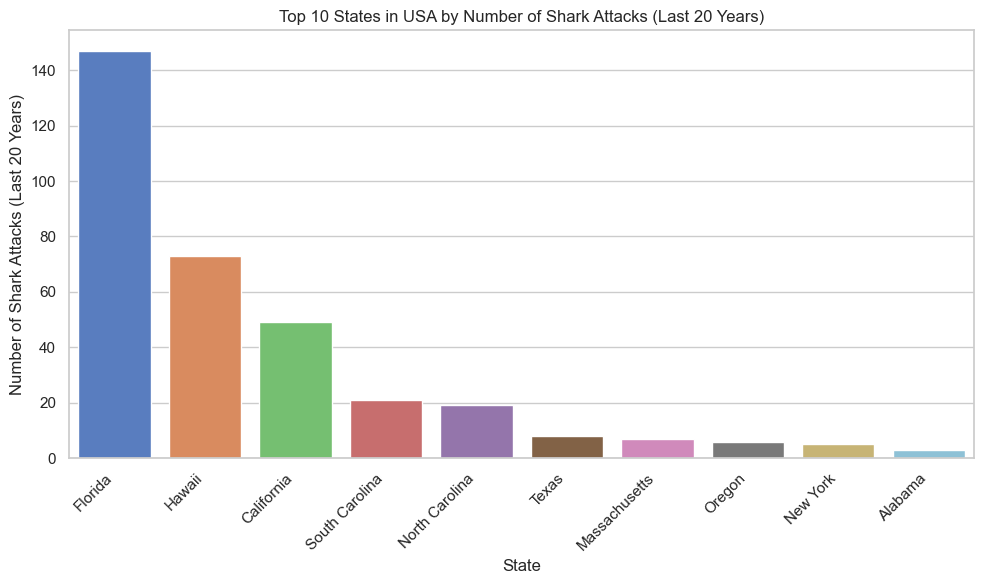

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only attacks from the last 20 years
usa_attacks_last_20_years = usa_attacks[usa_attacks['year'] >= current_year - 20]

# Select only the top 10 states within the USA from the last 20 years
usa_top_10_states_last_20_years = usa_attacks_last_20_years['state'].value_counts().head(10).reset_index()
usa_top_10_states_last_20_years.columns = ['state', 'Attacks']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the bar graph
sns.barplot(x='state', y='Attacks', data=usa_top_10_states_last_20_years, palette='muted')

plt.xlabel('State')
plt.ylabel('Number of Shark Attacks (Last 20 Years)')
plt.title('Top 10 States in USA by Number of Shark Attacks (Last 20 Years)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [34]:

# Filter the DataFrame for shark attacks in the USA
usa_attacks_df = new2_df[new2_df['country'] == 'United States']

# Filter the USA DataFrame for the last 50 years and earlier years
current_year = pd.to_datetime('today').year
last_50_years_usa_attacks = usa_attacks_df[usa_attacks_df['year'] >= current_year - 50]
earlier_years_usa_attacks = usa_attacks_df[usa_attacks_df['year'] < current_year - 50]

# Calculate the number of attacks in each period
num_attacks_last_50_years_usa = last_50_years_usa_attacks.shape[0]
num_attacks_earlier_years_usa = earlier_years_usa_attacks.shape[0]

# Compare the number of attacks in the USA in the last 50 years to before
if num_attacks_last_50_years_usa > num_attacks_earlier_years_usa:
    print("There were more shark attacks in the USA in the last 50 years compared to before.")
elif num_attacks_last_50_years_usa < num_attacks_earlier_years_usa:
    print("There were fewer shark attacks in the USA in the last 50 years compared to before.")
else:
    print("The number of shark attacks in the USA in the last 50 years is the same as before.")


There were more shark attacks in the USA in the last 50 years compared to before.


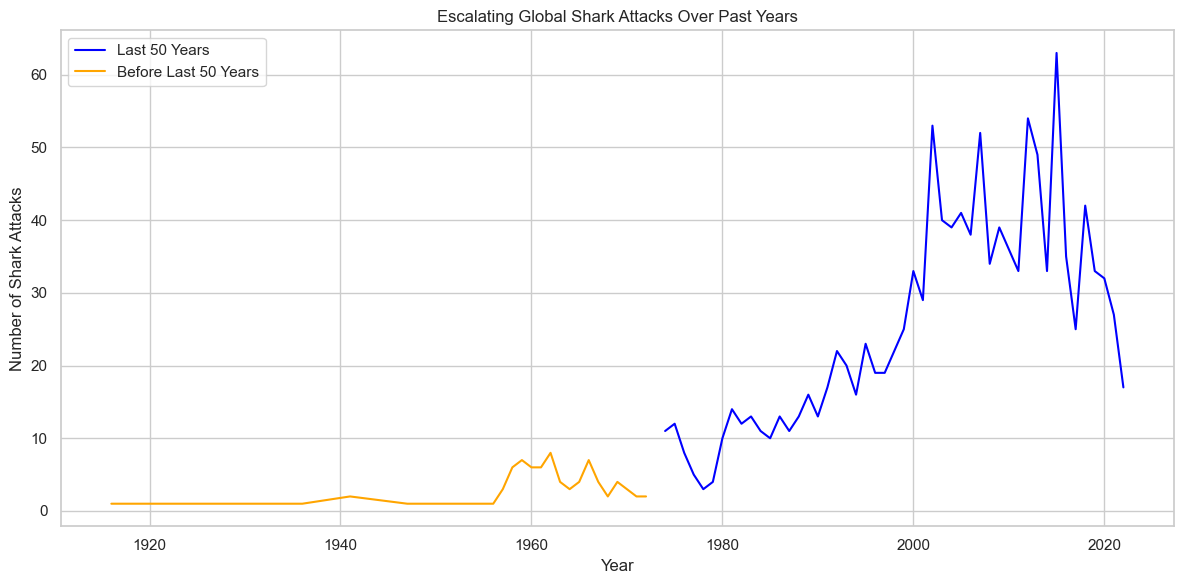

In [38]:

# Filter the USA DataFrame for the last 50 years and earlier years
current_year = pd.to_datetime('today').year
last_50_years_usa_attacks = new2_df[new2_df['year'] >= current_year - 50]
earlier_years_usa_attacks = usa_attacks_df[usa_attacks_df['year'] < current_year - 50]

# Count the number of attacks per year for the last 50 years and earlier years
num_attacks_last_50_years_usa = last_50_years_usa_attacks['year'].value_counts().reset_index()
num_attacks_last_50_years_usa.columns = ['Year', 'Attacks']
num_attacks_earlier_years_usa = earlier_years_usa_attacks['year'].value_counts().reset_index()
num_attacks_earlier_years_usa.columns = ['Year', 'Attacks']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the number of attacks in the last 50 years
sns.lineplot(x='Year', y='Attacks', data=num_attacks_last_50_years_usa, label='Last 50 Years', color='blue')

# Plot the number of attacks in the earlier years
sns.lineplot(x='Year', y='Attacks', data=num_attacks_earlier_years_usa, label='Before Last 50 Years', color='orange')

plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Escalating Global Shark Attacks Over Past Years')
plt.legend()
plt.tight_layout()
plt.show()


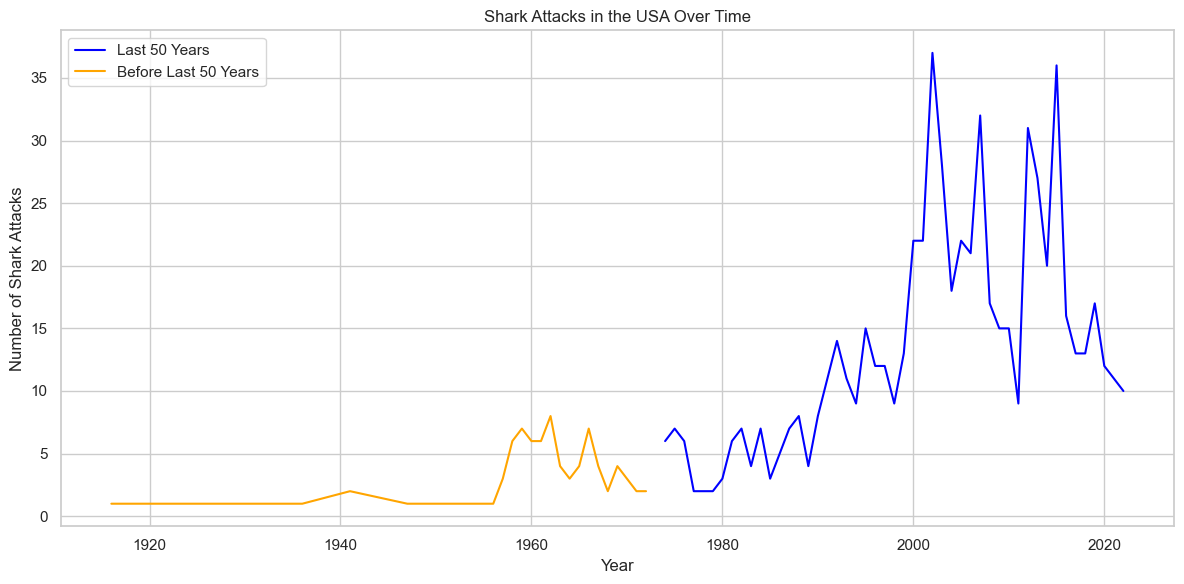

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the DataFrame for shark attacks in the USA
usa_attacks_df = new2_df[new2_df['country'] == 'United States']

# Filter the USA DataFrame for the last 50 years and earlier years
current_year = pd.to_datetime('today').year
last_50_years_usa_attacks = usa_attacks_df[usa_attacks_df['year'] >= current_year - 50]
earlier_years_usa_attacks = usa_attacks_df[usa_attacks_df['year'] < current_year - 50]

# Count the number of attacks per year for the last 50 years and earlier years
num_attacks_last_50_years_usa = last_50_years_usa_attacks['year'].value_counts().reset_index()
num_attacks_last_50_years_usa.columns = ['Year', 'Attacks']
num_attacks_earlier_years_usa = earlier_years_usa_attacks['year'].value_counts().reset_index()
num_attacks_earlier_years_usa.columns = ['Year', 'Attacks']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the number of attacks in the last 50 years
sns.lineplot(x='Year', y='Attacks', data=num_attacks_last_50_years_usa, label='Last 50 Years', color='blue')

# Plot the number of attacks in the earlier years
sns.lineplot(x='Year', y='Attacks', data=num_attacks_earlier_years_usa, label='Before Last 50 Years', color='orange')

plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks in the USA Over Time')
plt.legend()
plt.tight_layout()
plt.show()


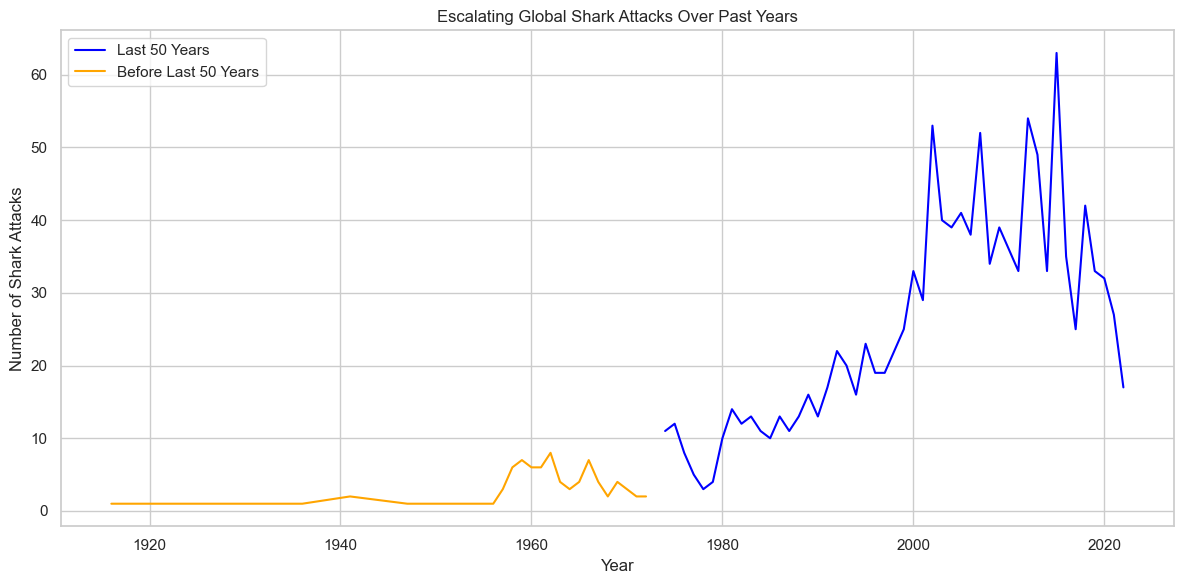

In [40]:
# Filter the USA DataFrame for the last 50 years and earlier years
current_year = pd.to_datetime('today').year
last_50_years_usa_attacks = new2_df[new2_df['year'] >= current_year - 50]
earlier_years_usa_attacks = usa_attacks_df[usa_attacks_df['year'] < current_year - 50]

# Count the number of attacks per year for the last 50 years and earlier years
num_attacks_last_50_years_usa = last_50_years_usa_attacks['year'].value_counts().reset_index()
num_attacks_last_50_years_usa.columns = ['Year', 'activities']
num_attacks_earlier_years_usa = earlier_years_usa_attacks['year'].value_counts().reset_index()
num_attacks_earlier_years_usa.columns = ['Year', 'activities']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the number of attacks in the last 50 years
sns.lineplot(x='Year', y='activities', data=num_attacks_last_50_years_usa, label='Last 50 Years', color='blue')

# Plot the number of attacks in the earlier years
sns.lineplot(x='Year', y='activities', data=num_attacks_earlier_years_usa, label='Before Last 50 Years', color='orange')

plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Escalating Global Shark Attacks Over Past Years')
plt.legend()
plt.tight_layout()
plt.show()


Surfing Attacks DataFrame:
      index  year        type        country                  state  \
1       138  2022  Unprovoked      Australia        New South Wales   
4       148  2022  Unprovoked  United States               New York   
5       154  2022  Unprovoked  United States               New York   
11      191  2022  Unprovoked      Australia        New South Wales   
18      231  2021  Unprovoked      Australia        New South Wales   
...     ...   ...         ...            ...                    ...   
1272   4115  1967  Unprovoked   South Africa  Western Cape Province   
1299   4227  1965  Unprovoked      Australia             Queensland   
1331   4363  1963    Provoked      Australia        New South Wales   
1361   4471  1962  Unprovoked      Australia        New South Wales   
1400   4622  1960  Unprovoked      Australia        New South Wales   

                               location activity sex  \
1                                 Avoca  Surfing   M   
4       

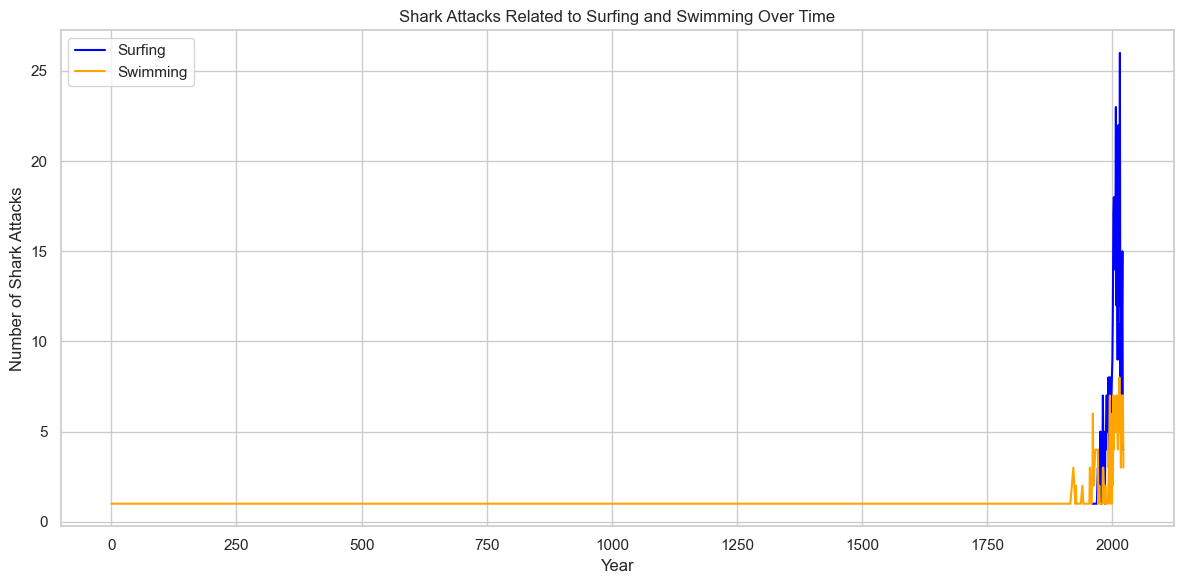

In [45]:


# Filter the DataFrame for surfing and swimming activities
surfing_attacks_df = new2_df[new2_df['activity'].str.lower() == 'surfing']
swimming_attacks_df = new2_df[new2_df['activity'].str.lower() == 'swimming']

# Print out the filtered DataFrames for inspection
print("Surfing Attacks DataFrame:")
print(surfing_attacks_df)
print("\nSwimming Attacks DataFrame:")
print(swimming_attacks_df)

# Count the number of attacks per year for surfing and swimming activities
num_surfing_attacks = surfing_attacks_df['year'].value_counts().reset_index()
num_surfing_attacks.columns = ['Year', 'Surfing Attacks']
num_swimming_attacks = swimming_attacks_df['year'].value_counts().reset_index()
num_swimming_attacks.columns = ['Year', 'Swimming Attacks']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the number of surfing attacks over the years with a label
sns.lineplot(x='Year', y='Surfing Attacks', data=num_surfing_attacks, label='Surfing', color='blue')

# Plot the number of swimming attacks over the years with a label
sns.lineplot(x='Year', y='Swimming Attacks', data=num_swimming_attacks, label='Swimming', color='orange')

plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks Related to Surfing and Swimming Over Time')
plt.legend()  # Call the legend function to display the legend
plt.tight_layout()
plt.show()


Surfing Attacks DataFrame:
      index  year        type        country       state  \
4       148  2022  Unprovoked  United States    New York   
5       154  2022  Unprovoked  United States    New York   
29      281  2021  Unprovoked  United States      Hawaii   
44      325  2020  Unprovoked  United States      Hawaii   
55      358  2020  Unprovoked  United States     Florida   
...     ...   ...         ...            ...         ...   
1228   3869  1974  Unprovoked  United States  California   
1233   3875  1974  Unprovoked  United States      Oregon   
1243   3952  1972  Unprovoked  United States     Florida   
1249   3973  1971  Unprovoked  United States     Florida   
1262   4062  1969  Unprovoked  United States      Hawaii   

                                               location activity sex  \
4                             Kismet Beach, Long Island  Surfing   M   
5                     Smith Point Beach, Suffolk County  Surfing   M   
29                              Mari

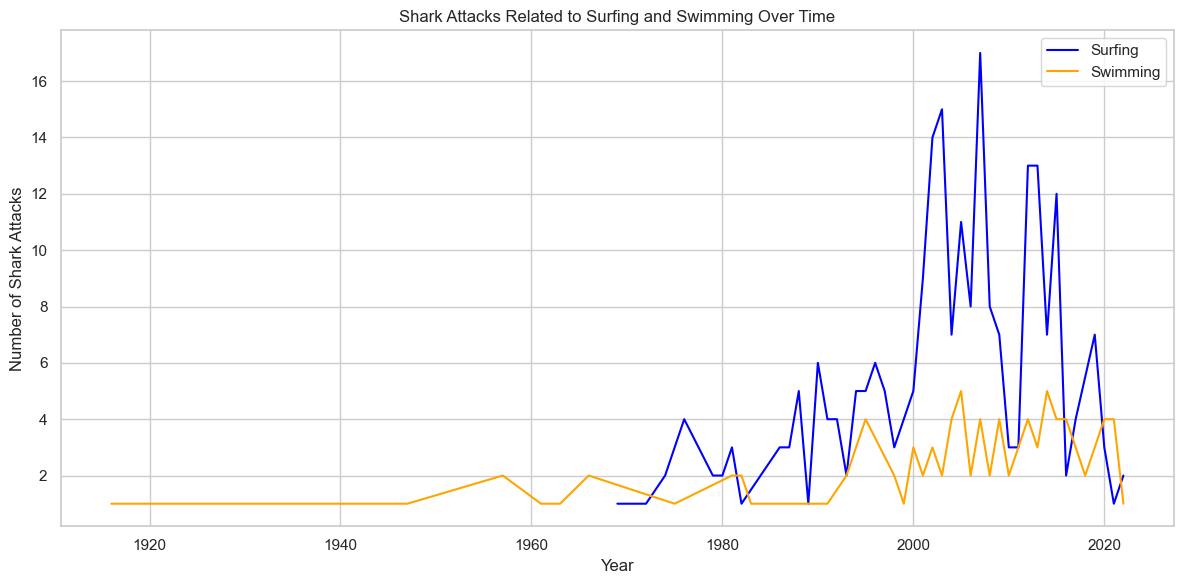

In [47]:




# Filter the DataFrame for shark attacks in the USA
usa_attacks_df = new2_df[new2_df['country'] == 'United States']

# Filter the DataFrame for surfing and swimming activities
surfing_attacks_df = usa_attacks_df[usa_attacks_df['activity'].str.lower() == 'surfing']
swimming_attacks_df = usa_attacks_df[usa_attacks_df['activity'].str.lower() == 'swimming']

# Print out the filtered DataFrames for inspection
print("Surfing Attacks DataFrame:")
print(surfing_attacks_df)
print("\nSwimming Attacks DataFrame:")
print(swimming_attacks_df)

# Count the number of attacks per year for surfing and swimming activities
num_surfing_attacks = surfing_attacks_df['year'].value_counts().reset_index()
num_surfing_attacks.columns = ['Year', 'Surfing Attacks']
num_swimming_attacks = swimming_attacks_df['year'].value_counts().reset_index()
num_swimming_attacks.columns = ['Year', 'Swimming Attacks']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the number of surfing attacks over the years with a label
sns.lineplot(x='Year', y='Surfing Attacks', data=num_surfing_attacks, label='Surfing', color='blue')

# Plot the number of swimming attacks over the years with a label
sns.lineplot(x='Year', y='Swimming Attacks', data=num_swimming_attacks, label='Swimming', color='orange')

plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks Related to Surfing and Swimming Over Time')
plt.legend()  # Call the legend function to display the legend
plt.tight_layout()
plt.show()



















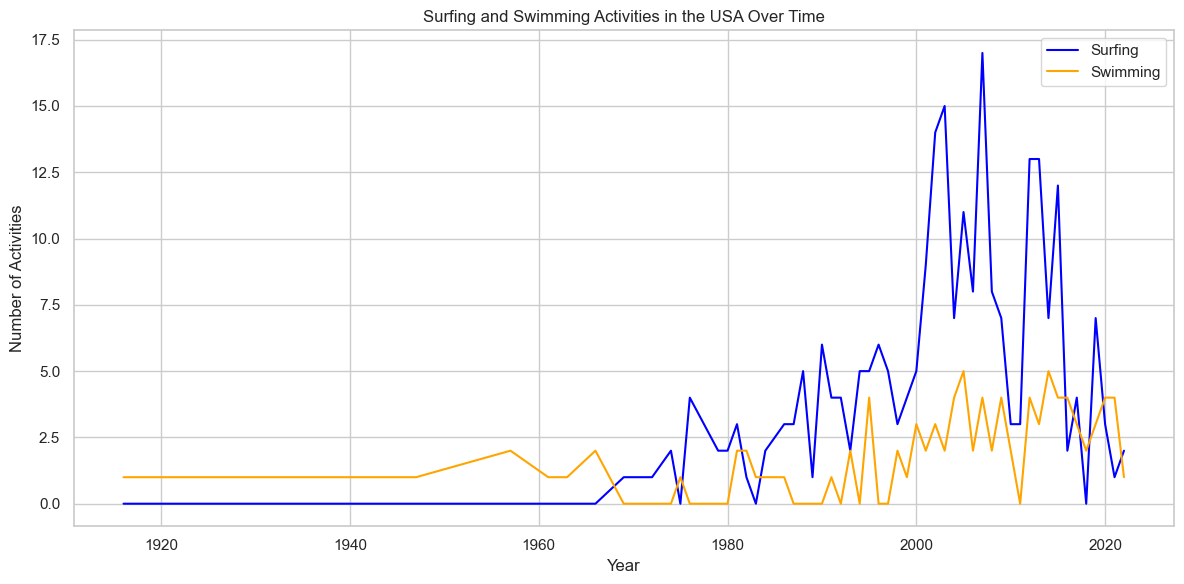

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the DataFrame for shark attacks in the USA
usa_attacks_df = new2_df[new2_df['country'] == 'United States']

# Filter the USA DataFrame for surfing and swimming activities
surfing_attacks_usa_df = usa_attacks_df[usa_attacks_df['activity'].str.lower() == 'surfing']
swimming_attacks_usa_df = usa_attacks_df[usa_attacks_df['activity'].str.lower() == 'swimming']

# Count the number of surfing and swimming activities per year in the USA
num_surfing_activities_usa = surfing_attacks_usa_df['year'].value_counts().reset_index()
num_surfing_activities_usa.columns = ['Year', 'Surfing Activities']
num_swimming_activities_usa = swimming_attacks_usa_df['year'].value_counts().reset_index()
num_swimming_activities_usa.columns = ['Year', 'Swimming Activities']

# Merge the counts of surfing and swimming activities
activity_counts_usa = num_surfing_activities_usa.merge(num_swimming_activities_usa, on='Year', how='outer').fillna(0)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the number of surfing activities over the years in the USA with a label
sns.lineplot(x='Year', y='Surfing Activities', data=activity_counts_usa, label='Surfing', color='blue')

# Plot the number of swimming activities over the years in the USA with a label
sns.lineplot(x='Year', y='Swimming Activities', data=activity_counts_usa, label='Swimming', color='orange')

plt.xlabel('Year')
plt.ylabel('Number of Activities')
plt.title('Surfing and Swimming Activities in the USA Over Time')
plt.legend()  # Call the legend function to display the legend
plt.tight_layout()
plt.show()


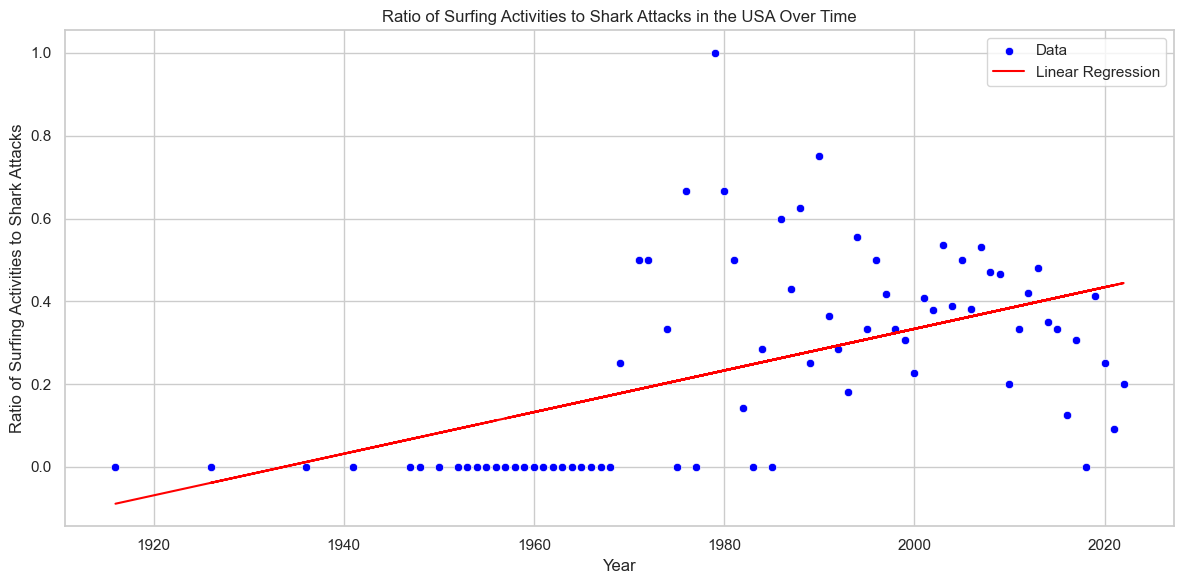

Pearson correlation coefficient (r): 0.5216993146518825


In [62]:

import numpy as np
from scipy.stats import linregress


# Filter the DataFrame for shark attacks and surfing activities in the USA
usa_attacks_df = new2_df[new2_df['country'] == 'United States']
surfing_attacks_usa_df = usa_attacks_df[usa_attacks_df['activity'].str.lower() == 'surfing']

# Count the number of shark attacks per year in the USA
num_shark_attacks_usa = usa_attacks_df['year'].value_counts().reset_index()
num_shark_attacks_usa.columns = ['Year', 'Shark Attacks']

# Count the number of surfing activities per year in the USA
num_surfing_activities_usa = surfing_attacks_usa_df['year'].value_counts().reset_index()
num_surfing_activities_usa.columns = ['Year', 'Surfing Activities']

# Merge the counts of surfing activities and shark attacks
activity_shark_counts_usa = num_surfing_activities_usa.merge(num_shark_attacks_usa, on='Year', how='outer').fillna(0)

# Calculate the ratio of surfing activities to shark attacks for each year
activity_shark_counts_usa['Surfing/Shark Attacks Ratio'] = activity_shark_counts_usa['Surfing Activities'] / activity_shark_counts_usa['Shark Attacks']

# Perform linear regression
slope, intercept, _, _, _ = linregress(activity_shark_counts_usa['Year'], activity_shark_counts_usa['Surfing/Shark Attacks Ratio'])
x_values = np.array(activity_shark_counts_usa['Year'])
y_values = slope * x_values + intercept

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the ratio of surfing activities to shark attacks over the years in the USA
sns.scatterplot(x='Year', y='Surfing/Shark Attacks Ratio', data=activity_shark_counts_usa, color='blue', label='Data')
plt.plot(x_values, y_values, color='red', label='Linear Regression')

plt.xlabel('Year')
plt.ylabel('Ratio of Surfing Activities to Shark Attacks')
plt.title('Ratio of Surfing Activities to Shark Attacks in the USA Over Time')
plt.legend()
plt.tight_layout()
plt.show()

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(activity_shark_counts_usa['Year'], activity_shark_counts_usa['Surfing/Shark Attacks Ratio'])

print("Pearson correlation coefficient (r):", pearson_corr)


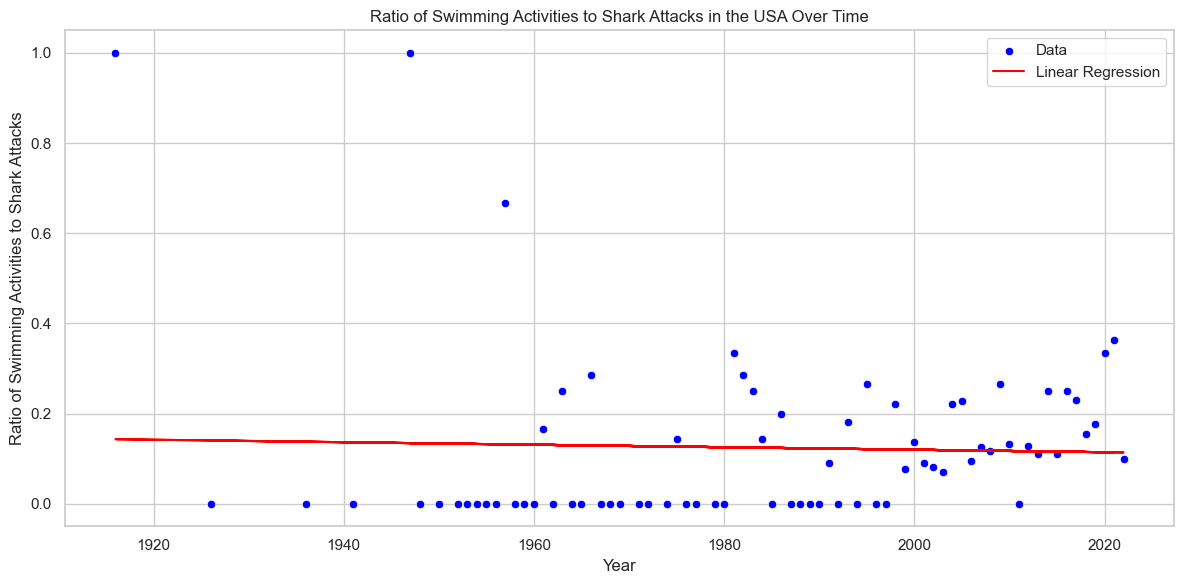

Pearson correlation coefficient (r): -0.0358583504729613


In [61]:

import numpy as np
from scipy.stats import linregress

# Filter the DataFrame for swimming activities in the USA
swimming_attacks_usa_df = new2_df[(new2_df['country'] == 'United States') & (new2_df['activity'].str.lower() == 'swimming')]

# Count the number of swimming activities per year in the USA
num_swimming_activities_usa = swimming_attacks_usa_df['year'].value_counts().reset_index()
num_swimming_activities_usa.columns = ['Year', 'Swimming Activities']

# Count the number of shark attacks per year in the USA
num_shark_attacks_usa = new2_df[new2_df['country'] == 'United States']['year'].value_counts().reset_index()
num_shark_attacks_usa.columns = ['Year', 'Shark Attacks']

# Merge the counts of swimming activities and shark attacks
activity_shark_counts_usa = num_swimming_activities_usa.merge(num_shark_attacks_usa, on='Year', how='outer').fillna(0)

# Calculate the ratio of swimming activities to shark attacks for each year
activity_shark_counts_usa['Swimming/Shark Attacks Ratio'] = activity_shark_counts_usa['Swimming Activities'] / activity_shark_counts_usa['Shark Attacks']

# Perform linear regression
slope, intercept, _, _, _ = linregress(activity_shark_counts_usa['Year'], activity_shark_counts_usa['Swimming/Shark Attacks Ratio'])
x_values = np.array(activity_shark_counts_usa['Year'])
y_values = slope * x_values + intercept

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the ratio of swimming activities to shark attacks over the years in the USA
sns.scatterplot(x='Year', y='Swimming/Shark Attacks Ratio', data=activity_shark_counts_usa, color='blue', label='Data')
plt.plot(x_values, y_values, color='red', label='Linear Regression')

plt.xlabel('Year')
plt.ylabel('Ratio of Swimming Activities to Shark Attacks')
plt.title('Ratio of Swimming Activities to Shark Attacks in the USA Over Time')
plt.legend()
plt.tight_layout()
plt.show()
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(activity_shark_counts_usa['Year'], activity_shark_counts_usa['Swimming/Shark Attacks Ratio'])

print("Pearson correlation coefficient (r):", pearson_corr)